# Urban Systems and Network Science

# Spring 2018

# Problem Set 2: Networks Models and Data Representation

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

comm_list = [40, 41, 50]

g = {}
for comm in comm_list:
    g[comm] = nx.read_pajek('comm' + str(comm) + '.net.paj')

## Problem 1: Social Network Analysis
In the SchoolsData.zip

Every student was given a paper-and-pencil questionnaire and a copy of a list with every schoolmate. Weighted dyadic links were generated based on the number of sheared activities. Weights were in the range from 1, meaning the student nominated the friend without reporting any activity, to 6 meaning that the student nominated the friend and reported participating in five activities with (him/her). Answer the following questions

### 1. How many nodes and links are there in each network? (0.5 pts.)

In [2]:
for comm in comm_list:
    print 'Nodes in comm' + str(comm) + ': ' + str(len(g[comm].nodes))
    print 'Links in comm' + str(comm) + ': ' + str(len(g[comm].edges))

Nodes in comm40: 2044
Links in comm40: 10498
Nodes in comm41: 2107
Links in comm41: 10513
Nodes in comm50: 2594
Links in comm50: 12979


### 2. What is the average degree of each network? (0.5 pts.)

In [3]:
for comm in comm_list:
    print 'Average degree of comm' + str(comm) + ': ' + str(np.mean(dict(g[comm].degree).values()))

Average degree of comm40: 10.272015655577299
Average degree of comm41: 9.979117228286663
Average degree of comm50: 10.006939090208173


### 3. Calculate the in-degree of each node. What is the largest in-degree in each networks? (1 pt.)

In [4]:
indegrees = {}
for comm in comm_list:
    indegrees[comm] = dict(g[comm].in_degree(g[comm].nodes))
    print 'Largest in-degree of comm' + str(comm) + ': ' + str(np.max(indegrees[comm].values()))

Largest in-degree of comm40: 33
Largest in-degree of comm41: 28
Largest in-degree of comm50: 27


### 4. Calculate the out-degree of each node. What is the largest out-degree in each network? (1 pt.)

In [5]:
outdegrees = {}
for comm in comm_list:
    outdegrees[comm] = dict(g[comm].out_degree(g[comm].nodes))
    print 'Largest out-degree of comm' + str(comm) + ': ' + str(np.max(outdegrees[comm].values()))

Largest out-degree of comm40: 10
Largest out-degree of comm41: 10
Largest out-degree of comm50: 10


### 5. Read the data as an undirected graph and calculate the average degree of each network (2 pts.)

In [6]:
g_undirected = {}
for comm in comm_list:
    g_undirected[comm] = nx.Graph(g[comm])
    print 'Average degree of undirected comm' + str(comm) + ': ' + str(np.mean(dict(g_undirected[comm].degree).values()))

Average degree of undirected comm40: 8.347358121330725
Average degree of undirected comm41: 8.212624584717608
Average degree of undirected comm50: 8.065535851966075


## Problem 2: Compare the School Network with Small World and Random Graphs models (10 pts)

### 1. What is the value of p in the RG generate similar average degree with the same number of Nodes? (1pt)

In [7]:
for comm in comm_list:
    p_RG = np.mean(dict(g[comm].degree).values())/len(g[comm].nodes) # p = <k>/N
    print 'p-value of comm' + str(comm) + ' if RG: ' + str(p_RG)

p-value of comm40 if RG: 0.005025447972395939
p-value of comm41 if RG: 0.00473617334043031
p-value of comm50 if RG: 0.0038577251697024567


In [8]:
for comm in comm_list:
    p_RG = np.mean(dict(g_undirected[comm].degree).values())/len(g_undirected[comm].nodes) # p = <k>/N
    print 'p-value of undirected comm' + str(comm) + ' if RG: ' + str(p_RG)

p-value of undirected comm40 if RG: 0.004083834697324229
p-value of undirected comm41 if RG: 0.0038977810084089262
p-value of undirected comm50 if RG: 0.0031093044918913165


### 2. What is the value of p in the Watts and Strogatz graph to generate the desired value of the average degree and Clustering Coefficient with the same number of Nodes? (1pt)

In [9]:
for comm in comm_list:
    k_avg = np.mean(dict(g_undirected[comm].degree).values())
    C_0 = (3*(k_avg-2))/(4*(k_avg-1)) # (3*(<k>-2))/(4*(<k>-1))
    C_p = nx.average_clustering(g_undirected[comm])
    p_SW = 1 - np.cbrt(C_p/C_0) # p = 1-(C_p/C_0)^(1/3)
    print 'p-value of undirected comm' + str(comm) + ' if W&G: ' + str(p_SW)

p-value of undirected comm40 if W&G: 0.39552520150972625
p-value of undirected comm41 if W&G: 0.4021403301374471
p-value of undirected comm50 if W&G: 0.3936169988542547


### 3. Fill the following table with the properties the networks (3pts)

In [10]:
rg = {}
sw = {}
for comm in comm_list:
    print 'comm' + str(comm) + '\n'
    print 'School Data'
    print '<C>: ' + str(nx.average_clustering(g_undirected[comm]))
    k = np.mean(dict(g_undirected[comm].degree).values())
    print '<k>: ' + str(k)
    N = len(g[comm].nodes)
    print '  N: ' + str(N)
    print '  E: ' + str(len(g[comm].edges))
    p_rg = k/N
    rg[comm] = nx.fast_gnp_random_graph(N,p_rg)
    print '\nRandom Graph'
    print '<C>: ' + str(nx.average_clustering(rg[comm]))
    print '<k>: ' + str(N*p_rg)
    print '  E: ' + str(len(rg[comm].edges))
    print '  p: ' + str(p_rg)
    C_0 = (3*(k-2))/(4*(k-1)) # (3*(<k>-2))/(4*(<k>-1))
    C_p = nx.average_clustering(g_undirected[comm])
    p_sw = 1 - np.cbrt(C_p/C_0) # p = 1-(C_p/C_0)^(1/3)
    sw[comm] = nx.watts_strogatz_graph(N,int(k),p_sw)
    print '\nSmall World'
    print '<C>: ' + str(nx.average_clustering(sw[comm]))
    print '<k>: ' + str(k)
    print '  E: ' + str(len(sw[comm].edges))
    print '  p: ' + str(p_sw)
    print '\n\n\n'

comm40

School Data
<C>: 0.143105937938
<k>: 8.347358121330725
  N: 2044
  E: 10498

Random Graph
<C>: 0.00455674190997
<k>: 8.347358121330725
  E: 8595
  p: 0.004083834697324229

Small World
<C>: 0.154960483092
<k>: 8.347358121330725
  E: 8176
  p: 0.39552520150972625




comm41

School Data
<C>: 0.138051401638
<k>: 8.212624584717608
  N: 2107
  E: 10513

Random Graph
<C>: 0.00413783747978
<k>: 8.212624584717608
  E: 8451
  p: 0.0038977810084089262

Small World
<C>: 0.141390769227
<k>: 8.212624584717608
  E: 8428
  p: 0.4021403301374471




comm50

School Data
<C>: 0.143557665537
<k>: 8.065535851966075
  N: 2594
  E: 12979

Random Graph
<C>: 0.00269053781867
<k>: 8.065535851966075
  E: 10560
  p: 0.0031093044918913165

Small World
<C>: 0.145734959806
<k>: 8.065535851966075
  E: 10376
  p: 0.3936169988542547






| Network		| Avg ClusCoeff	| Avg K  	| Nodes  	| Links  	| p 	|
|-:				|-:				|-:			|-:			|-:			|-:		|
| School Data 1	| 0.143  		| 8.347  	| 2044 		| 10498  	| N/A 	|
| Random Graph	| 0.004 		| 8.347 	| 2044  	| 8649  	| 0.004 |
| Small World	| 0.150  		| 8.347  	| 2044  	| 8176  	| 0.396 |

| Network		| Avg ClusCoeff	| Avg K  	| Nodes  	| Links  	| p 	|
|-:				|-:				|-:			|-:			|-:			|-:		|
| School Data 2	| 0.138  		| 8.213  	| 2107 		| 12979  	| N/A 	|
| Random Graph	| 0.003 		| 8.213 	| 2107  	| 8492  	| 0.004 |
| Small World	| 0.146  		| 8.213  	| 2107  	| 8428  	| 0.402 |

| Network		| Avg ClusCoeff	| Avg K  	| Nodes  	| Links  	| p 	|
|-:				|-:				|-:			|-:			|-:			|-:		|
| School Data 3	| 0.144  		| 8.066  	| 2594 		| 10498  	| N/A 	|
| Random Graph	| 0.003 		| 8.066 	| 2594  	| 10403  	| 0.003 |
| Small World	| 0.147  		| 8.066  	| 2594  	| 10376  	| 0.394 |

### 4. Which of the 2 models have properties more similar to the social network from the data? Why? (3pts)

Judging from comparisons of the average clustering coefficients between the data networks and the two models, for a fixed k and node count, small-world appears to be much more similar to the school data than the random graph model. Intuitively this makes sense because an individual's friends are very likely to be friends with each other as in the small-world model and unlike the random-graph model.


### 5. In the same Figure, Plot the Degree Distribution of the three Networks (2pts)

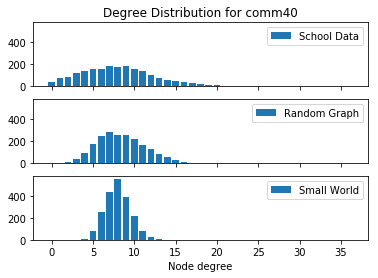

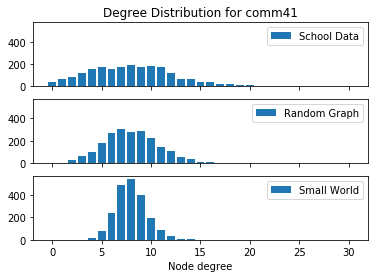

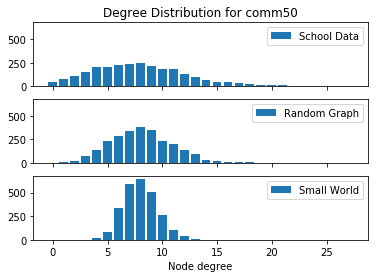

In [11]:
import collections

for comm in comm_list:
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, sharex=True)
    
    # data
    degreeCount = collections.Counter(sorted([d for n, d in g_undirected[comm].degree()], reverse=True))
    d, c = zip(*degreeCount.items())
    ax1.bar(d, c, label='School Data')
    ax1.legend()
    ax1.set_title('Degree Distribution for comm' + str(comm))
    
    # random graph
    degreeCount = collections.Counter(sorted([d for n, d in rg[comm].degree()], reverse=True))
    d, c = zip(*degreeCount.items())
    ax2.bar(d, c, label='Random Graph')
    ax2.legend()
    
    # small world
    degreeCount = collections.Counter(sorted([d for n, d in sw[comm].degree()], reverse=True))
    d, c = zip(*degreeCount.items())
    ax3.bar(d, c, label='Small World')
    ax3.legend()
    
    plt.xlabel('Node degree')
    plt.show()